## Lithium niobate dispersion

It is usual to model the dispersion of transparent optical materials with Sellmeier's equation:

$$
n^2(\lambda) = 1 + \sum_{k=1}^{m}{\frac{A_k \lambda^2}{\lambda^2 - B_k}},
$$

where we are modeling $m$ independent resonances. Writing this equation in terms of $\omega$ we get:

$$
n^2(\omega) = 1 + \sum_{k=1}^{m}{\frac{\omega_k^2}{\omega_k^2 - \omega^2} \chi_k^{(1)}},
$$

with:

$$
\chi_k^{(1)} = A_k \\
\omega_k = \frac{2\pi c}{\sqrt {B_k}}.
$$

Each one of these equations is the solution of Lorentz Equation:

$$
\frac{d^2P(t)}{dt^2} + \omega_k^2 P(t) = \epsilon_0 \omega_k^2 \, \chi_k^{(1)} E(t).
$$

## Units

For distance, let's use microns (the Sellmeier coefficients below are for microns).

For frequency, THz. This means time will be measured in ps, so the speed of light will be in um/ps

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.constants import c,pi,mu_0,epsilon_0
c = c*1e-6

In [2]:
def term(A,B,wavelength):
    return A*wavelength**2/(wavelength**2-B)

def n2(Coeff,wavelength):
    n2 = 1
    n2 = n2 + term(Coeff[0], Coeff[1], wavelength)
    n2 = n2 + term(Coeff[2], Coeff[3], wavelength)
    n2 = n2 + term(Coeff[4], Coeff[5], wavelength)
    return n2

From this paper:

"Infrared corrected Sellmeier coefficients for
congruently grown lithium niobate
and 5 mol. % magnesium oxide–doped
lithium niobate"

Zelmon and Jundt

## Congruently grown LN (undoped)

In [3]:
#Coefficients from the paper

#Extraordinary waves
A_ne = 2.9804
B_ne = 0.02047
C_ne = 0.5981
D_ne = 0.0666
E_ne = 8.9543
F_ne = 416.08

#Ordinary waves
A_no = 2.6734
B_no = 0.01764
C_no = 1.2290
D_no = 0.05914
E_no = 12.614
F_no = 474.6

step = 0.01
wavelength = np.arange(0.4,5+step,step)

no2 = n2([A_no,B_no,C_no,D_no,E_no,F_no],wavelength)
ne2 = n2([A_ne,B_ne,C_ne,D_ne,E_ne,F_ne],wavelength)

no = np.sqrt(no2)
ne = np.sqrt(ne2)

plt.plot(wavelength, no, 'r')
plt.plot(wavelength, ne, 'b')
plt.legend(['no','ne'])
plt.axis([0, 5, 2, 2.4])
plt.xlabel('$\mathrm{\lambda (\mu m)}$')
plt.ylabel('$\mathrm{n}$')
plt.grid()
plt.title('Congruently grown $\mathrm{LiNbO_3}$ doped with 5-mol% MgO')
plt.savefig('LN_doped.pdf')

## Curve fitting (n vs wavelength)

Effective index at 1.5um = 2.1390
Chromatic Dispersion at 1.5um = -0.029722 1/um
Group index at 1.5um = 2.1836


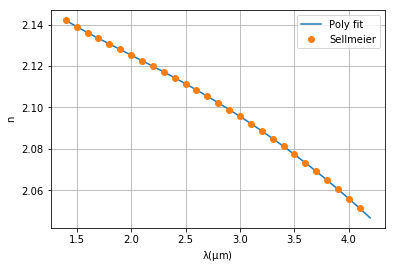

In [4]:
#Fitting range:
lamda_sellmeier_step = 0.1
lamda_sellmeier = np.arange(1.4,4.2,lamda_sellmeier_step)
#Sellmeier equation:
n_2_sellmeier = n2([A_ne,B_ne,C_ne,D_ne,E_ne,F_ne], lamda_sellmeier)
n_sellmeier = np.sqrt(n_2_sellmeier)

#Polynomial fit
order = 12
fit = np.polynomial.polynomial.Polynomial.fit(lamda_sellmeier, n_sellmeier, order)
fit_coeff = np.flip(fit.convert().coef)
n_vs_l = np.poly1d(fit_coeff)

#Test fit
fit_test_lamda = np.arange(1.4,4.2,lamda_sellmeier_step*0.05)
fit_test_n = n_vs_l(fit_test_lamda)
print("Effective index at 1.5um = %0.4f" %(n_vs_l(1.5)))

#Plot
plt.plot(fit_test_lamda, fit_test_n)
plt.plot(lamda_sellmeier, n_sellmeier, 'o')
plt.legend(['Poly fit','Sellmeier'])
plt.grid()
plt.xlabel('$\mathrm{\lambda (\mu m)}$')
plt.ylabel('$\mathrm{n}$')

#Chromatic Dispersion (dn/dl)
dn_dl = n_vs_l.deriv()
print("Chromatic Dispersion at 1.5um = %0.6f 1/um" %(dn_dl(1.5)))
#plt.plot(fit_test_lamda, dn_dl(fit_test_lamda))

#Group index (n-l*dn/dl)
l_vs_l = np.poly1d([1, 0]) #Polynomial that represents wavelength
ng_vs_l = n_vs_l - l_vs_l*dn_dl
print("Group index at 1.5um = %0.4f" %(ng_vs_l(1.5)))

## Fitting vs frequency

Fit starts at 4.28275 um
Fit stops at 1.42758 um
Test frequency = 199.86 THz

Effective index at 1.5um = 2.1390
Group index at 1.5um = 2.1836
GVD at 1.5um = 111.8608 fs^2/mm
D at 1.5um = -93.6475 ps/nm/km


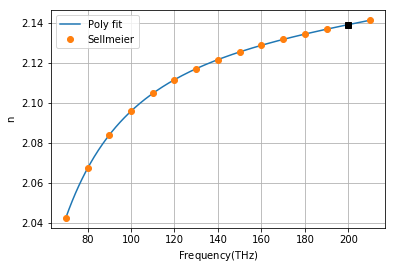

In [5]:
#Fitting range:
f_sellmeier_step = 10
#f_start = 199.86-f_sellmeier_step
#f_stop = 199.86+f_sellmeier_step
f_start = 70
f_stop = 210
f_sellmeier = np.arange(f_start,f_stop+f_sellmeier_step,f_sellmeier_step)
w_sellmeier = 2*pi*f_sellmeier
lamda_sellmeier = c/f_sellmeier

print("Fit starts at %0.5f um" %(c/f_start))
print("Fit stops at %0.5f um" %(c/f_stop))

#Sellmeier equation:
n_2_sellmeier = n2([A_ne,B_ne,C_ne,D_ne,E_ne,F_ne], lamda_sellmeier)
n_sellmeier = np.sqrt(n_2_sellmeier)

#Polynomial fit
order = 13
fit = np.polynomial.polynomial.Polynomial.fit(w_sellmeier, n_sellmeier, order)
fit_coeff = np.flip(fit.convert().coef)
n_vs_w = np.poly1d(fit_coeff)

#Test wavelength
test_lamda = 1.5
test_f = c/test_lamda
test_w = 2*pi*test_f
print('Test frequency = %0.2f THz' %(test_f))
print('')

#Test fit
fit_test_f = np.arange(f_start,f_stop,f_sellmeier_step*0.05)
fit_test_n = n_vs_w(2*pi*fit_test_f)
print("Effective index at %0.1fum = %0.4f" %(test_lamda, n_vs_w(test_w)))

#Plot
plt.plot(fit_test_f, fit_test_n)
plt.plot(f_sellmeier, n_sellmeier, 'o')
plt.legend(['Poly fit','Sellmeier'])
plt.grid()
plt.xlabel('$\mathrm{Frequency (THz)}$')
plt.ylabel('$\mathrm{n}$')
plt.plot(test_f, n_vs_w(test_w), 'sk')

#Propagation constant (b = w*n/c)
w_vs_w = np.poly1d([1, 0]) #Polynomial that represents angular frequency
b_vs_w = w_vs_w*n_vs_w/c
db_dw = b_vs_w.deriv()

#Group index
ng_vs_w = c*db_dw
print("Group index at %0.1fum = %0.4f" %(test_lamda, ng_vs_w(test_w)))

#Group velocity dispersion
GVD_vs_w = db_dw.deriv()
print("GVD at %0.1fum = %0.4f fs^2/mm" %(test_lamda, GVD_vs_w(test_w)*1e9))

#Dispersion parameters
D_vs_w = -w_vs_w*w_vs_w*GVD_vs_w/(2*pi*c)
print("D at %0.1fum = %0.4f ps/nm/km" %(test_lamda, D_vs_w(test_w)*1e6))

Text(0,0.5,'$\\mathrm{beta}$')

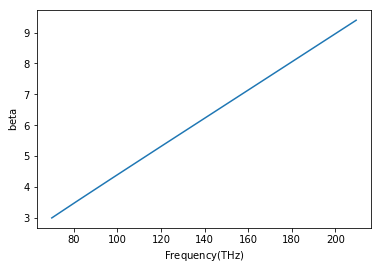

In [6]:
plt.plot(fit_test_f, b_vs_w(2*pi*fit_test_f))
plt.xlabel('$\mathrm{Frequency (THz)}$')
plt.ylabel('$\mathrm{beta}$')

Text(0,0.5,'$\\mathrm{b1}$')

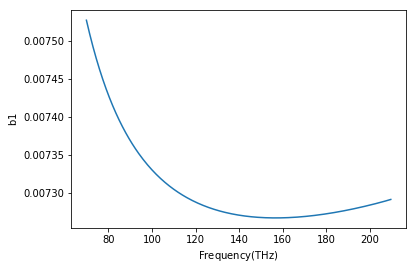

In [7]:
plt.plot(fit_test_f, db_dw(2*pi*fit_test_f))
plt.xlabel('$\mathrm{Frequency (THz)}$')
plt.ylabel('$\mathrm{b1}$')

Text(0,0.5,'$\\mathrm{b2=GVD}$')

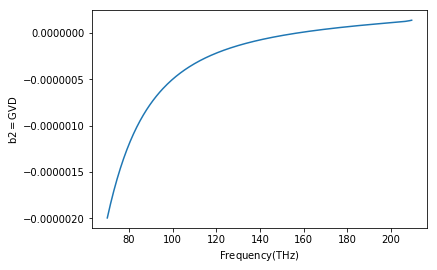

In [8]:
plt.plot(fit_test_f, GVD_vs_w(2*pi*fit_test_f))
plt.xlabel('$\mathrm{Frequency (THz)}$')
plt.ylabel('$\mathrm{b2=GVD}$')